In [2]:
import json 
import numpy as np 
import pandas as pd 

In [3]:
pwd

'/Users/taesoodaniellee/Documents/heaviside/multiclass_src/notebooks'

joining all results with evaluation results into a larger json

In [4]:
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/old_runs"
output_file = "20201122_results.json"
file_path1 = "/".join([results_path, output_file])
with open(file_path1, "r+") as f1: 
    results_20201122 = json.load(f1)
    print(len(results_20201122))

output_file = "20201123_results.json"
file_path2 = "/".join([results_path, output_file])
with open(file_path2, "r+") as f2: 
    results_20201123 = json.load(f2) 
    print(len(results_20201123))

output_file = "prev.json"
file_path4 = "/".join([results_path, output_file])
with open(file_path4, "r+") as f4: 
    prev_json = json.load(f4) 
    print(len(prev_json))
    
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results"
output_file = "20201124_results.json"
file_path3 = "/".join([results_path, output_file])
with open(file_path3, "r+") as f3: 
    results_20201124 = json.load(f3) 
    print(len(results_20201124))
    
output_file = "results2.json"
file_path5 = "/".join([results_path, output_file])
with open(file_path5, "r+") as f5: 
    results5 = json.load(f5) 
    print(len(results5))


41
69
146
40
42


In [5]:
print("--")
results_20201122 += results_20201123
print(len(results_20201122))
results_20201122 += results_20201124
print(len(results_20201122))
results_20201122 += prev_json
print(len(results_20201122))
results_20201122 += results5
print(len(results_20201122))
total_results = results_20201122
print(len(total_results))

--
110
150
296
338
338


now, bringing in the evaluation jsons. 

In [6]:
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/old_runs"
output_file = "20201122_eval.json"
file_path1 = "/".join([results_path, output_file])
with open(file_path1, "r+") as f1: 
    results_20201122_e = json.load(f1)
    print(len(results_20201122_e))

output_file = "20201123_eval.json"
file_path2 = "/".join([results_path, output_file])
with open(file_path2, "r+") as f2: 
    results_20201123_e = json.load(f2) 
    print(len(results_20201123_e))

output_file = "20201124_eval.json"
file_path3 = "/".join([results_path, output_file])
with open(file_path3, "r+") as f3: 
    results_20201124_e = json.load(f3) 
    print(len(results_20201124_e))

output_file = "results_eval_thresh.json"
file_path4 = "/".join([results_path, output_file])
with open(file_path4, "r+") as f4: 
    res4 = json.load(f4) 
    print(len(res4))
    
output_file = "trained_thresh_evaluations.json"
file_path5 = "/".join([results_path, output_file])
with open(file_path5, "r+") as f5: 
    res5 = json.load(f5) 
    print(len(res5))


45
69
36
40
55


In [7]:
print("--")
results_20201122_e += results_20201123_e
results_20201122_e += results_20201124_e
results_20201122_e += res4
results_20201122_e += res5
total_evals = results_20201122_e
print(len(total_evals))

--
245


In [8]:
for i in range(len(total_results)): 
    for eval_res in total_evals: 
        if ('run_name' in total_results[i]) and ('run' in eval_res): 
            if total_results[i]['run_name'] == eval_res['run']: 
                total_results[i]['evaluation'] = eval_res 

In [10]:
mismatch=0
for i in range(len(total_results)): 
    if 'evaluation' not in total_results[i]: 
        mismatch +=1 

In [11]:
mismatch

96

In [27]:
len(total_results)

338

In [36]:
def remove_dups(arr):
    seen = []
    for x in arr: 
        if x not in seen: 
            if 'run_name' in x: 
                if x['run_name'] not in ['testoutfile', 'None-0', 'None-0']: 
                    seen.append(x) 
    return seen 

In [37]:
new_results = remove_dups(total_results)

In [38]:
len(new_results)

294

In [41]:
# results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/cifar_results.json"
# with open(results_path, "w") as outfile: 
#     json.dump(new_results, outfile)

# Analyzing 

In [44]:
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results"
output_file = "cifar_results.json"
fp = "/".join([results_path, output_file])
with open(fp, "r+") as f: 
    results = json.load(f)
    print(len(results))

294


In [45]:
run_list = [x['run_name'] for x in results if 'run_name' in x]

# imbalanced 2048 

In [50]:
imb_2048_approx_f1_runs = ['2048-approx-f1-imb-0', '2048-approx-f1-imb-1', '2048-approx-f1-imb-2','2048-approx-f1-imb-3',
 '2048-approx-f1-imb-4','2048-approx-f1-imb-5','2048-approx-f1-imb-6','2048-approx-f1-imb-7',
 '2048-approx-f1-imb-8','2048-approx-f1-imb-9']

imb_2048_ce_runs = ['2048-baseline-imb-0','2048-baseline-imb-1','2048-baseline-imb-2',
 '2048-baseline-imb-3','2048-baseline-imb-4','2048-baseline-imb-5','2048-baseline-imb-6',
 '2048-baseline-imb-7','2048-baseline-imb-8','2048-baseline-imb-9']

imb_2048_wt_approx_f1_runs = ['2048-approx-f1-imb-wt-0','2048-approx-f1-imb-wt-1',
 '2048-approx-f1-imb-wt-2','2048-approx-f1-imb-wt-3','2048-approx-f1-imb-wt-4',
 '2048-approx-f1-imb-wt-5','2048-approx-f1-imb-wt-6','2048-approx-f1-imb-wt-7',
 '2048-approx-f1-imb-wt-8','2048-approx-f1-imb-wt-9',]

In [47]:
def extract_runs_from_json(results_json, runs_array): 
    extract = [x for x in results_json if x['run_name'] in runs_array]
    print(len(extract))
    return extract

In [51]:
imb_2048_approx_f1 = extract_runs_from_json(results, imb_2048_approx_f1_runs)
imb_2048_ce = extract_runs_from_json(results, imb_2048_ce_runs)
imb_2048_wt_approx_f1 = extract_runs_from_json(results, imb_2048_wt_approx_f1_runs)

10
10
10


In [104]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape'''
    agg = {}
    agg["run"] = '-'.join(results_json[0]['run_name'].split('-')[:-1])
    agg['loss'] = np.mean([x['loss'] for x in results_json])
    agg['test_wt_f1_score'] = np.mean([x['test_wt_f1_score'] for x in results_json])
    agg['val_wt_f1_score'] = np.mean([x['val_wt_f1_score'] for x in results_json])
    agg['test_accuracy'] = np.mean([x['test_accuracy'] for x in results_json])
    agg['val_accuracy'] = np.mean([x['val_accuracy'] for x in results_json])
    agg['loss_metric'] = results_json[0]['loss_metric']
    
    # adding in distributions. 
    train_dxns = [x['train_dxn'] for x in results_json]
    agg['train_dxn'] = np.mean(train_dxns, axis=0)
    test_dxns = [x['test_dxn'] for x in results_json]
    agg['test_dxn'] = np.mean(test_dxns, axis=0)
    valid_dxns = [x['valid_dxn'] for x in results_json]
    agg['valid_dxn'] = np.mean(valid_dxns, axis=0)
    
    # adding in evaluation results. 
    # keep in mind that the evaluation distribution is evenly weighted. 
    eval_json = {}
    taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    for tau in taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x['evaluation'][str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x['evaluation'][str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
    agg['eval'] = eval_json
    
    return agg 

In [106]:
imb_2048_approx_f1_agg = aggregate_runs(imb_2048_approx_f1)
imb_2048_ce_agg = aggregate_runs(imb_2048_ce)
imb_2048_wt_approx_f1_agg = aggregate_runs(imb_2048_wt_approx_f1)

In [107]:
imb_2048_approx_f1_agg

{'run': '2048-approx-f1-imb',
 'loss': 0.475086,
 'test_wt_f1_score': 0.445702,
 'val_wt_f1_score': 0.48222899999999996,
 'test_accuracy': 0.44322,
 'val_accuracy': 0.4753,
 'loss_metric': 'approx-f1',
 'train_dxn': array([1026271.6, 1028190.7, 1029742.2, 1028495.1, 1028165.3, 1030258.8,
        1027245.6, 1029868.1, 1028623.4, 1030139.2]),
 'test_dxn': array([229600., 229600., 229600., 229600., 229600., 229600., 229600.,
        229600., 229600., 229600.]),
 'valid_dxn': array([117239.4, 115309.7, 113754. , 115003.9, 115337.2, 113233.6,
        116262.3, 113627. , 114878. , 113354.9]),
 'eval': {'0.1': {'mean_f1': 0.44924984574317933,
   'class_f1s': array([0.52405462, 0.55160717, 0.34666741, 0.31300906, 0.3940404 ,
          0.39219911, 0.49934774, 0.50287759, 0.57751656, 0.39117877])},
  '0.2': {'mean_f1': 0.44151652455329893,
   'class_f1s': array([0.52726083, 0.53663333, 0.35498933, 0.30892923, 0.36609191,
          0.38543474, 0.49395746, 0.50181458, 0.5738842 , 0.36616963])},
  

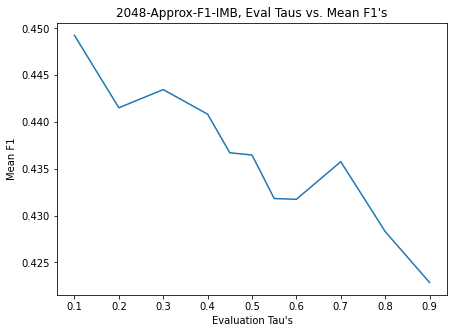

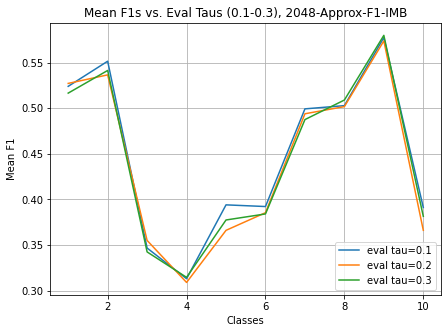

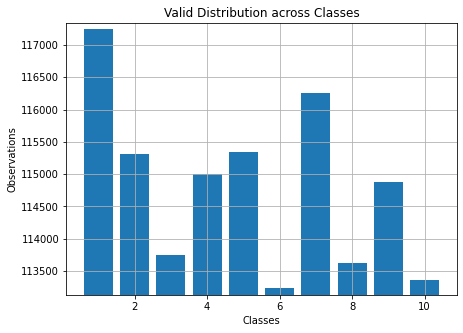

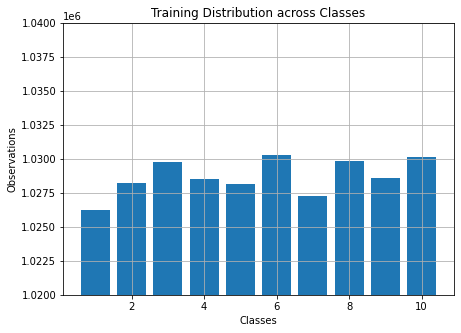

In [165]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
eval_res = imb_2048_approx_f1_agg['eval']
mean_f1s = [eval_res[x]['mean_f1'] for x in eval_res]
plt.title("2048-Approx-F1-IMB, Eval Taus vs. Mean F1's")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.plot(taus,mean_f1s)
plt.show()

# Plotting for Class 0.1 
classes = [x for x in range(1,11)]
class_0_1_f1s = imb_2048_approx_f1_agg['eval']['0.1']['class_f1s']
plt.plot(classes,class_0_1_f1s, label="eval tau=0.1")
class_0_2_f1s = imb_2048_approx_f1_agg['eval']['0.2']['class_f1s']
plt.plot(classes,class_0_2_f1s, label="eval tau=0.2")
class_0_3_f1s = imb_2048_approx_f1_agg['eval']['0.3']['class_f1s']
plt.plot(classes,class_0_3_f1s, label="eval tau=0.3")

plt.title("Mean F1s vs. Eval Taus (0.1-0.3), 2048-Approx-F1-IMB")
plt.xlabel("Classes")
plt.ylabel("Mean F1")
plt.grid()
plt.legend()
plt.show()

# VALID DISTRIBUTION 
heights = imb_2048_approx_f1_agg['valid_dxn']
classes = [x for x in range(1,11)]
plt.ylim(min(heights)-100, max(heights)+100)
plt.bar(classes, heights)

plt.xlabel("Classes")
plt.ylabel("Observations")
plt.title("Valid Distribution across Classes")
plt.grid()
plt.show()

# TRAIN DISTRIBUTION 
heights = imb_2048_approx_f1_agg['train_dxn']
classes = [x for x in range(1,11)]
plt.ylim(1020000, 1040000)
plt.xlabel("Classes")
plt.ylabel("Observations")
plt.title("Training Distribution across Classes")
plt.bar(classes, heights)
plt.grid()
plt.show()

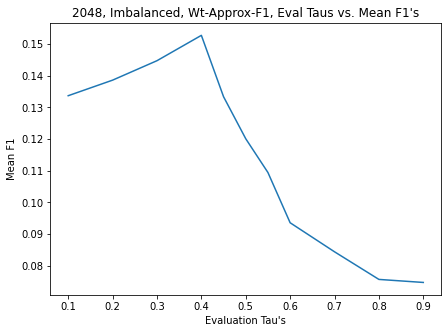

In [126]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
eval_res = imb_2048_wt_approx_f1_agg['eval']
mean_f1s = [eval_res[x]['mean_f1'] for x in eval_res]
plt.title("2048, Imbalanced, Wt-Approx-F1, Eval Taus vs. Mean F1's")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.plot(taus,mean_f1s)
plt.show()

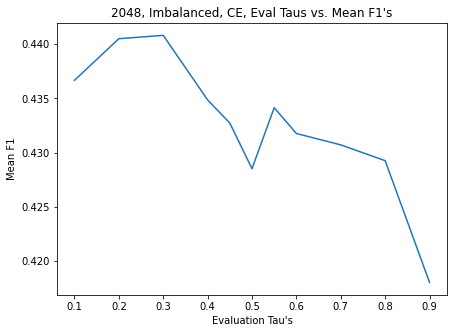

In [127]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
eval_res = imb_2048_ce_agg['eval']
mean_f1s = [eval_res[x]['mean_f1'] for x in eval_res]
plt.title("2048, Imbalanced, CE, Eval Taus vs. Mean F1's")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.plot(taus,mean_f1s)
plt.show()

In [ ]:
# look at valid, train, and test distributions 


In [ ]:
# plot the class f1's across the taus 

In [43]:
sorted(run_list)

['1024-approx-f1-imb-0',
 '1024-approx-f1-imb-1',
 '1024-approx-f1-imb-2',
 '1024-approx-f1-imb-3',
 '1024-approx-f1-imb-4',
 '1024-approx-f1-imb-5',
 '1024-approx-f1-imb-6',
 '1024-approx-f1-imb-7',
 '1024-approx-f1-imb-8',
 '1024-approx-f1-imb-9',
 '1024-approx-f1-imb-wt-0',
 '1024-approx-f1-imb-wt-1',
 '1024-approx-f1-imb-wt-2',
 '1024-approx-f1-imb-wt-3',
 '1024-approx-f1-imb-wt-4',
 '1024-approx-f1-imb-wt-5',
 '1024-approx-f1-imb-wt-6',
 '1024-approx-f1-imb-wt-7',
 '1024-approx-f1-imb-wt-8',
 '1024-approx-f1-imb-wt-9',
 '1024-approx-f1-regular-0',
 '1024-approx-f1-regular-1',
 '1024-approx-f1-regular-2',
 '1024-approx-f1-regular-3',
 '1024-approx-f1-regular-4',
 '1024-approx-f1-regular-5',
 '1024-approx-f1-regular-6',
 '1024-approx-f1-regular-7',
 '1024-approx-f1-regular-8',
 '1024-approx-f1-regular-9',
 '1024-approx-f1-regular-wt-0',
 '1024-approx-f1-regular-wt-1',
 '1024-approx-f1-regular-wt-2',
 '1024-approx-f1-regular-wt-3',
 '1024-approx-f1-regular-wt-4',
 '1024-approx-f1-reg